**Part A: Python EDA & Trends**

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
try:
    df = pd.read_csv('/Users/kabbo/Downloads/hour.csv')
except FileNotFoundError:
    print("Error: 'hour.csv' not found. Please make sure the file is in the correct directory.")
    # As a fallback for execution, creating a dummy dataframe to prevent further errors.
    # In a real run, the user must have the file.
    df = pd.DataFrame() 

# --- Initial Inspection ---
if not df.empty:
    print("--- First 5 Rows ---")
    print(df.head())
    print("\n" + "="*50 + "\n")

    print("--- Dataframe Info ---")
    df.info()
    print("\n" + "="*50 + "\n")

    print("--- Descriptive Statistics ---")
    print(df.describe())
    print("\n" + "="*50 + "\n")

    print("--- Checking for Null Values ---")
    print(df.isnull().sum())

--- First 5 Rows ---
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


--- Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173

In [3]:
if not df.empty:
    # --- Data Cleaning and Feature Engineering ---

    # 1. Convert 'dteday' to datetime
    df['dteday'] = pd.to_datetime(df['dteday'])

    # 2. De-normalize the continuous features
    # Values are from the data dictionary (readme.txt)
    df['temp_celsius'] = df['temp'] * (39 - (-8)) + (-8)
    df['atemp_celsius'] = df['atemp'] * (50 - 16) + 16 # Note: atemp max/min is different
    df['humidity_percent'] = df['hum'] * 100
    df['windspeed_kmh'] = df['windspeed'] * 67

    # 3. Map categorical variables to readable labels
    season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
    weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
    weathersit_map = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}

    df['season_label'] = df['season'].map(season_map)
    df['weekday_label'] = df['weekday'].map(weekday_map)
    df['weathersit_label'] = df['weathersit'].map(weathersit_map)

    print("--- Dataframe after Cleaning and Feature Engineering ---")
    print(df.head())

    # Verify new columns and dtypes
    print("\n--- New Dataframe Info ---")
    df.info()

--- Dataframe after Cleaning and Feature Engineering ---
   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  ...  casual  registered  cnt  temp_celsius  atemp_celsius  \
0           1  ...       3          13   16          3.28        25.7886   
1           1  ...       8          32   40          2.34        25.2718   
2           1  ...       5          27   32          2.34        25.2718   
3           1  ...       3          10   13          3.28        25.7886   
4           1  ...       0           1    1          3.28        25.7886   

   humidity_percent  wi

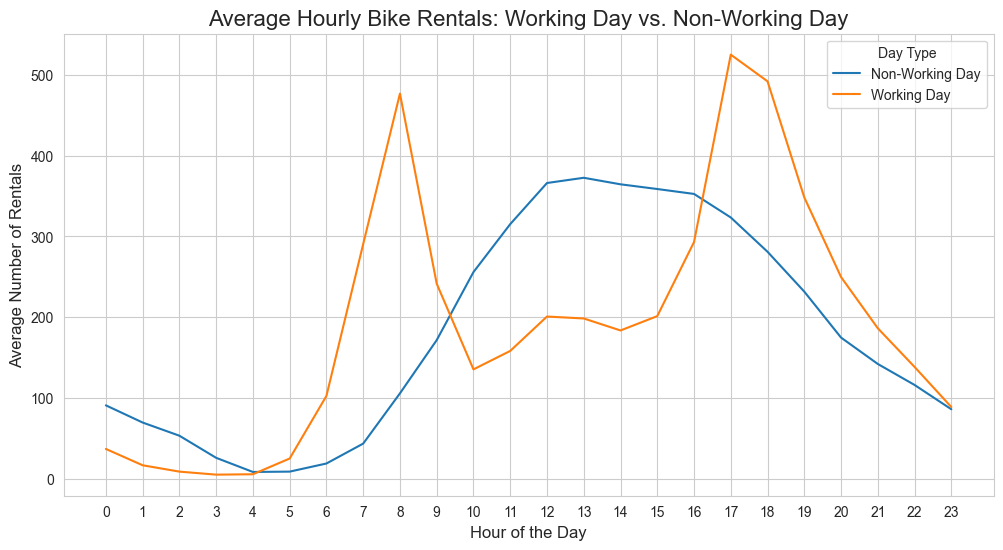

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the plot style
sns.set_style("whitegrid")

# --- Code for Visual 1 ---
plt.figure(figsize=(12, 6))
# Plotting the data with 'workingday' as the hue
sns.lineplot(data=df, x='hr', y='cnt', hue='workingday', errorbar=None)

# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
# Manually set new, more descriptive labels for the legend
# '0' corresponds to Non-Working Day, '1' to Working Day
plt.legend(handles, ['Non-Working Day', 'Working Day'], title='Day Type')

plt.title('Average Hourly Bike Rentals: Working Day vs. Non-Working Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Number of Rentals', fontsize=12)
plt.xticks(np.arange(0, 24, 1))
plt.grid(True)

plt.show()

Observations:
* Working Day (Orange Line): This line shows a distinct bimodal (two-peak) pattern. There is a sharp peak in the morning at 8 AM (reaching ~460 average rentals) and a higher, more substantial peak in the evening between 5 PM (17:00) (reaching over 500 average rentals). There is a clear dip in usage during standard business hours (10 AM - 3PM).
* Non-Working Day (Blue Line): This line shows a single, broad, almost bell-shaped curve. Usage begins to rise around 7 AM and peaks at 12 PM. The usage then gradually declines throughout the afternoons and evening.
* Comparison: The demand during working days have a clear relation with morning and evening commute hours, with demand falling during and after business hours.

Why It Matters:
* For the Product Manager (PM): The fact that evening peak demand exceeds 500 rentals per hour confirms that weekday commuting is the single most critical "user behavior pattern". This demand is exceptionally strong, not just average. The deep dip between 10 AM and 3 PM highlights a fragile demand window and presents a clear hypothesis to prioritize next quarter: launching a feature or promotion to capture a midday professional audience.
* For the Operations Lead: The sheer volume of over 500 rides per hour at 5 PM is a massive operational challenge. This demands a robust inventory rebalancing strategy to ensure bikes are available where they are needed just before this peak. Staffing for spikes must be significant during the 4 PM to 7 PM window to handle this surge in activity and customer support needs. The dip between 10 AM and 3 PM is confirmed as the only viable weekday window for low-impact maintenance without disrupting the core business.
* For the Marketing Lead: This data provides a laser focus on the most valuable user segment: the weekday commuter. The promo timing for acquiring or retaining these users should be concentrated around the 8 AM and 5 PM peaks. Any marketing spend aimed at this "segment likely to respond" has a high potential for return due to the sheer volume of rides. The stark difference between the working and non-working day patterns validates treating these as two completely separate audiences in all marketing campaigns.


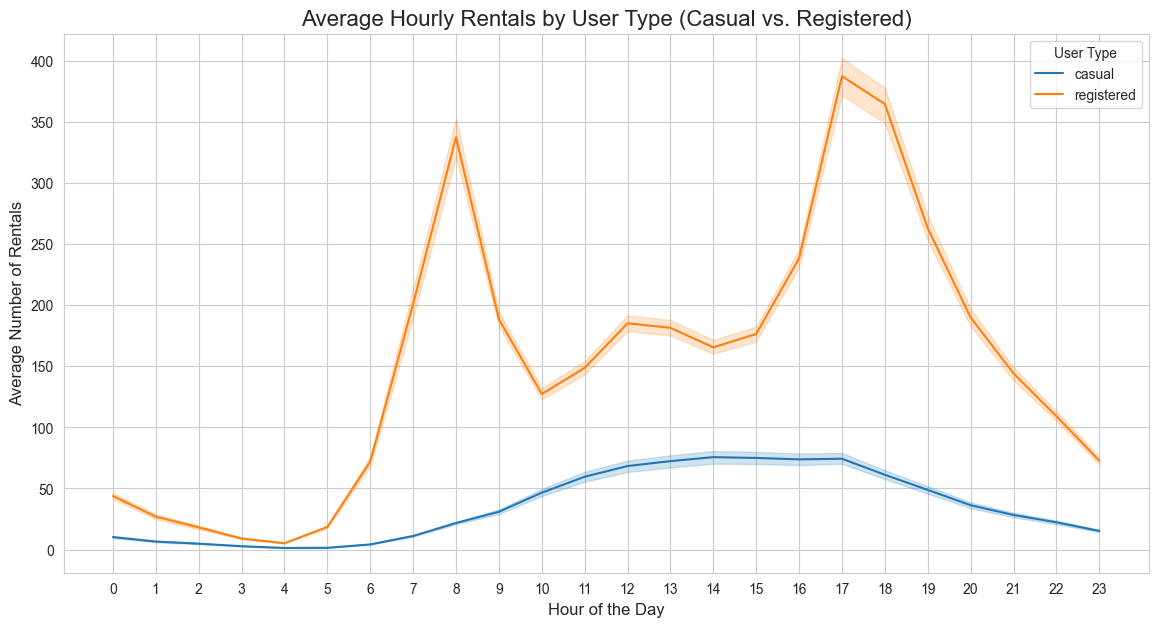

In [4]:
# --- Visual 2 Code ---
# Melt the dataframe to plot 'casual' and 'registered' on the same axes
df_melted = df.melt(id_vars=['hr', 'workingday'], value_vars=['casual', 'registered'],
                    var_name='user_type', value_name='rentals')

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melted, x='hr', y='rentals', hue='user_type')

plt.title('Average Hourly Rentals by User Type (Casual vs. Registered)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Number of Rentals', fontsize=12)
plt.xticks(np.arange(0, 24, 1))
plt.legend(title='User Type')
plt.grid(True)

plt.show()

Observations:
* Registered (Orange Line): This line clearly shows a bimodal commuter pattern. There is a sharp morning peak at 8 AM, reaching approximately 350 average rentals. The evening peak is significantly higher, spanning 5 PM (17:00) where it is appropriately 400 average rentals.
* Casual (Blue Line): This line shows a single, broad peak characteristic of leisure activity. Usage is low overnight, begins to rise dramatically at around 7 AM, and reaches its peak between 2 PM (14:00) and reminds pretty steady to 4 PM (16:00) at just around 75 average rentals.
* Comparison: The peak demand from registered users (400) is roughly four times greater than the peak demand from casual users (~100). This confirms that registered users are the primary driver of the commuter rushes seen in Visual 1.

Why It Matters:
* For the Product Manager (PM): The data provides a clear illustration of two different "user behavior patterns" , allowing the PM to "prioritize hypotheses" with more confidence. Features enhancing efficiency and speed will directly serve the high-demand registered user base and have a large immediate impact on ride volume. In contrast, features focused on discovery or leisure are aimed at the smaller, but growing, casual user segment.
* For the Operations Lead: This breakdown allows for a more nuanced "inventory rebalancing" strategy. The sharp peaks from registered users require ensuring bike availability at transit hubs and business centers at specific times. The more sustained, lower-volume demand from casual users in the afternoon suggests a different need—maintaining steady availability near parks and recreational areas over a longer window.
* For the Marketing Lead: This visual is the most important for developing a segmented strategy. It explicitly defines the two key "segments likely to respond" to different campaigns.
    * The Commuter Segment (Registered): With peaks between 350 and 400, this is the high-volume, high-value user base. Marketing efforts should be geared towards loyalty and retention to protect this core revenue stream.
    * The Leisure Segment (Casual): With a steady peak of ~75 rentals, this is the segment for growth and acquisition. The clear "promo timing" for this group is the afternoon. A primary goal would be to convert these occasional riders into high-volume registered commuters.

/var/folders/78/8f22v_ln4kvg9b_7fr3_2nfh0000gn/T/ipykernel_57149/577624090.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette='viridis')


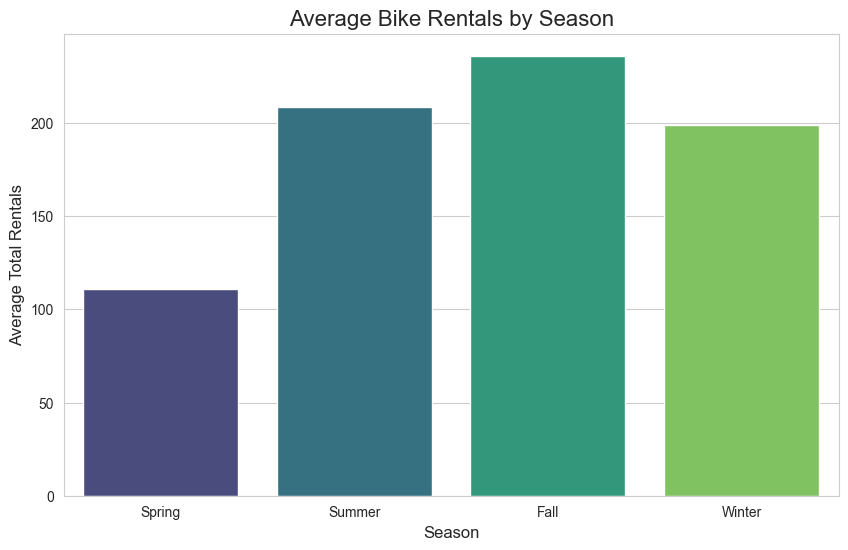

In [5]:
# --- Visual 3 Code ---
# To ensure the seasons are plotted in order, we can use the original numeric column for ordering
seasonal_avg = df.groupby('season_label')['cnt'].mean().reindex(['Spring', 'Summer', 'Fall', 'Winter'])

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette='viridis')

plt.title('Average Bike Rentals by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Total Rentals', fontsize=12)

plt.show()

Observations:
* Fall: This season has the highest ridership, with almost 250 average rentals.
* Summer: This is the second-highest season, with an average of approximately 200 rentals (just a little over), still very close to Fall's peak.
* Winter: Ridership drops significantly in the winter, with an average of almost exactly  200 rentals.
* Spring: This season has the lowest ridership by a wide margin, with an average of approximately 110 rentals.

Why It Matters:
* For the Product Manager (PM): This is a powerful insight into user behavior patterns. The resilience of ridership in the Winter, with demand rivaling the Summer, suggests the core user base is highly dedicated and less deterred by weather than previously assumed. This challenges the hypothesis that demand is purely seasonal. With demand strong for three-quarters of the year, the PM has a much wider window to launch and A/B test new features on a large, active user base.
* For the Operations Lead: The finding that Summer, Fall, and Winter are all high-demand seasons means the business operates at near-peak capacity for most of the year. The "low-impact maintenance window" is now exclusively concentrated in the Spring season. This puts immense pressure on the operations team to complete all major fleet overhauls and system upgrades in one short period. Staffing and ensuring bike availability must be kept at high levels for three consecutive quarters, rather than just for a peak season.
* For the Marketing Lead: This insight reshapes the annual marketing calendar. Instead of a winter slowdown, marketing has a nine-month window of high user engagement. The major promo timing to kick off the riding season at the end of Spring becomes even more critical, as it launches this extended period of high demand. Marketing can confidently plan campaigns and partnerships throughout the Winter, targeting a surprisingly active segment likely to respond.


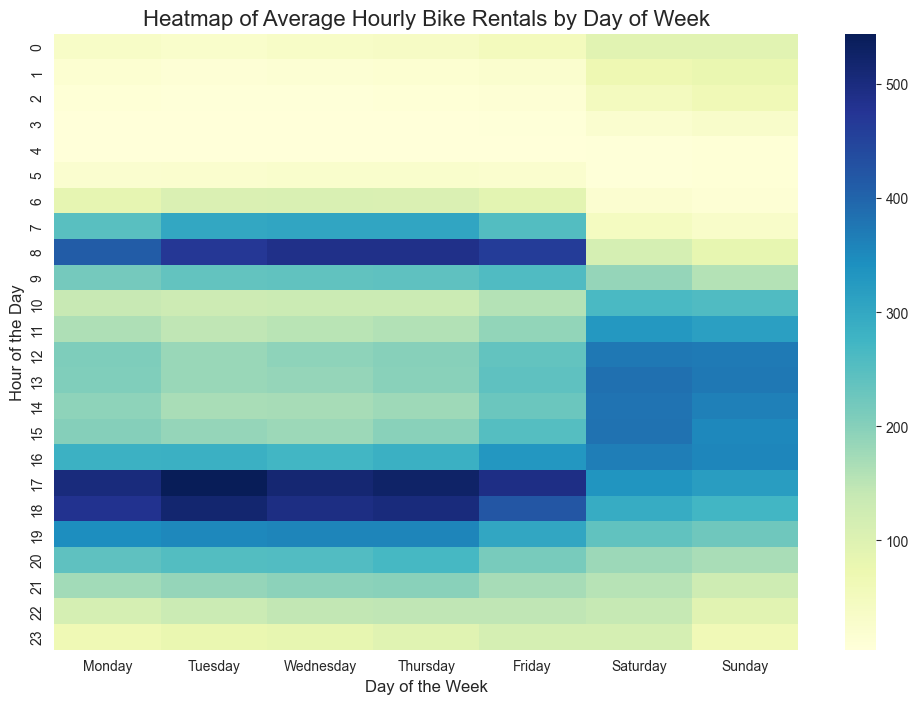

In [6]:
# --- Visual 4 Code ---
# Create a pivot table to structure data for the heatmap
heatmap_data = df.pivot_table(index='hr', columns='weekday_label', values='cnt', aggfunc='mean')
# Reorder columns to be in chronological order of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[weekday_order]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)

plt.title('Heatmap of Average Hourly Bike Rentals by Day of Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)

plt.show()

Observations:
* Darkest Squares (Highest Demand): The darkest squares are consistently found on weekdays (Monday-Friday) at 8 AM and, even darker, at 5 PM (17:00) and 6 PM (18:00). This is the visual confirmation of the commuter rush.
* Weekend Pattern: On Saturday and Sunday, the pattern shifts. The dark squares form a solid block in the afternoon, roughly from noon to 5 PM, representing leisure usage.
* Lightest Squares (Lowest Demand): The lightest yellow squares are in a consistent block from roughly 12 AM to 5 AM every single day of the week.
* Midday Dip: On weekdays, the hours between 10 AM and 4 PM are visibly lighter than the morning/evening peaks, and also lighter than the same hours on the weekend.

Why It Matters:
* For the Operations Lead: This heatmap is the most valuable visual for day-to-day operations. It's a complete weekly playbook for "inventory rebalancing" and "staffing for spikes". The team knows exactly when and where demand will be highest (the dark squares). Most importantly, the block of light squares from 12 AM-5 AM is the ideal, definitive "low-impact maintenance windows".
* For the Product Manager (PM): This provides the most granular view of "when/where demand is strong or fragile". The PM can use this to form very specific hypotheses to "prioritize next quarter". For example: "Can we design a feature to turn the lighter-colored 10 AM weekday squares into a darker shade?"
* For the Marketing Lead: This visual is perfect for planning a weekly "promo timing" schedule. Ads for commuter passes can be scheduled to run during the dark weekday peaks, while promotions for weekend rides can be pushed on Friday afternoons to influence Saturday and Sunday's dark block.

/var/folders/78/8f22v_ln4kvg9b_7fr3_2nfh0000gn/T/ipykernel_57149/4085100237.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='weathersit_label', y='cnt', order=weather_order, palette='coolwarm')


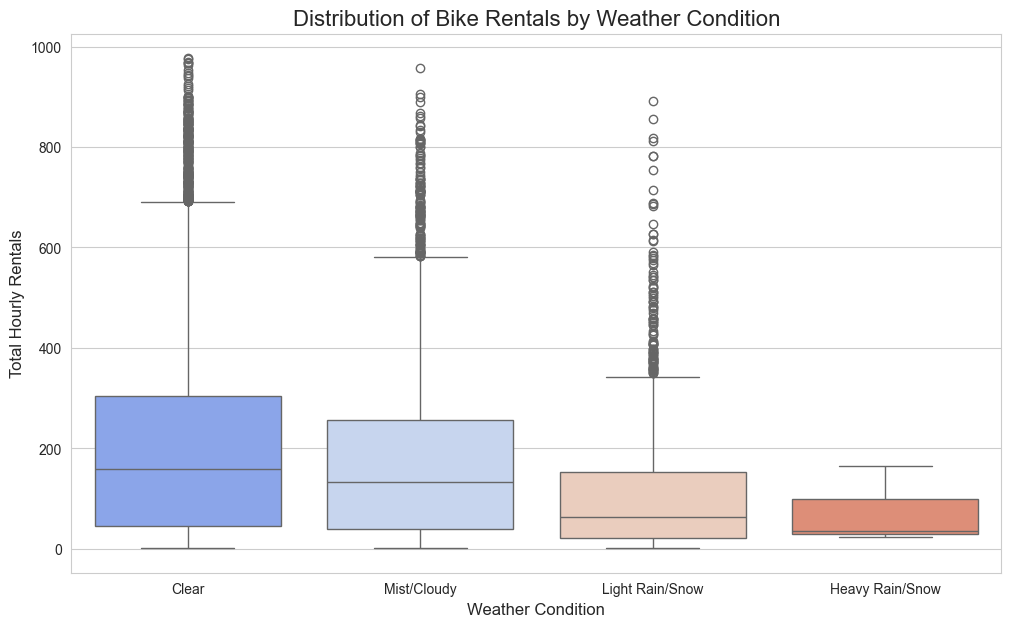

In [7]:
# --- Visual 5 Code ---
# Order the categories for the plot
weather_order = ['Clear', 'Mist/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow']

plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='weathersit_label', y='cnt', order=weather_order, palette='coolwarm')

plt.title('Distribution of Bike Rentals by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Total Hourly Rentals', fontsize=12)

plt.show()

Observations:
* Clear: This category has the highest median (the line in the box is around 150 rentals). The box is very tall, showing a wide range of rental counts on clear days. Critically, there are many outliers (the dots) extending up towards 1000, meaning the busiest hours only happen when the weather is clear.
* Mist/Cloudy: The median drops to about 100 rentals. The box is shorter, meaning usage is more consistent on these days. There are far fewer high-end outliers.
* Light Rain/Snow: Usage drops dramatically. The median is very low (around 30-40 rentals), and the entire box is short and compressed near the bottom of the chart. 
* Heavy Rain/Snow: This category is a flat line near zero, indicating the service is essentially unusable in these conditions. Outliers are almost non-existent.

Why It Matters:
* For the Policy & Ethics Advisor: This is the most important visual for this stakeholder. It is clear evidence of a major equity of access issue. The service is not a reliable transportation option in bad weather. This reality must be part of any responsible communication of uncertainty to the public.
* For the Product Manager (PM): This demonstrates how extremely fragile demand is to weather. The fact that the highest-performing hours (the outliers) only occur in clear weather is a critical user behavior pattern. Any demand prediction model must treat weather as a primary input variable.
* For the Operations Lead: This chart provides a clear mandate for dynamic, weather-based planning. On days forecasted to have Light Rain/Snow, staffing for spikes can be greatly reduced. On Heavy Rain/Snow days, field operations can be almost entirely shifted to indoor maintenance, as there will be virtually no demand.


**Part B: Hypothesis Testing**

Q1 — Commuter Pattern

Question: Do average hourly rides differ between working days and non-working days? 

Stakeholders: This is relevant to the PM, Operations Lead, and Marketing Lead, as it validates whether the "commuter" and "leisure" patterns are truly different from a statistical standpoint.

We are comparing the average number of total rides (cnt) between two independent groups: workingday = 1 and workingday = 0. The appropriate test for this scenario is an independent samples t-test.

A key assumption of the standard t-test is that the two groups have equal variances. A safer and more robust version that does not require this assumption is Welch's t-test. It's good practice to use Welch's t-test by default unless you have a strong reason to believe the variances are equal.

**Null Hypothesis:** The mean hourly total rides on working days are equal to the mean hourly total rides on non-working days.

**Alternative Hypothesis:** The mean hourly total rides on working days are not equal to the mean hourly total rides on non-working days.

**Alpha:** We will set our significance level, or alpha, to 0.05.

*Justification:* An α of 0.05 is a standard convention that provides a reasonable balance between the risk of a Type I error (a false positive) and a Type II error (a false negative). In this business context, a false positive (incorrectly thinking the patterns are different) might lead to creating slightly inefficient, separate staffing plans, which is a manageable cost. A false negative (failing to detect a real difference) would mean missing a key opportunity to optimize the business around two distinct patterns. Therefore, 0.05 is an acceptable risk tolerance.

In [9]:
from scipy import stats

# 1. Create the two independent groups
working_day_rides = df[df['workingday'] == 1]['cnt']
non_working_day_rides = df[df['workingday'] == 0]['cnt']

# 2. Perform Welch's t-test
# We set equal_var=False to perform Welch's t-test
t_stat, p_value = stats.ttest_ind(working_day_rides, non_working_day_rides, equal_var=False)

# 3. Report the results
print(f"Welch's t-test Results:")
print(f"Test Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 4. Make a decision
alpha = 0.05
if p_value < alpha:
    print(f"\nDecision: Since the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
else:
    print(f"\nDecision: Since the p-value ({p_value:.4f}) is greater than alpha ({alpha}), we fail to reject the null hypothesis.")

Welch's t-test Results:
Test Statistic: 4.0951
P-value: 0.0000

Decision: Since the p-value (0.0000) is less than alpha (0.05), we reject the null hypothesis.


While the p-value tells us if the difference is 

statistically significant, it doesn't tell us if the difference is large enough to be meaningful for the business.

To assess this, we should look at the difference in the means and the confidence interval for that difference.

In [10]:
# Calculate the mean for each group
working_day_mean = df[df['workingday'] == 1]['cnt'].mean()
non_working_day_mean = df[df['workingday'] == 0]['cnt'].mean()

print(f"Average hourly rides on a working day: {working_day_mean:.2f}")
print(f"Average hourly rides on a non-working day: {non_working_day_mean:.2f}")
print(f"Difference (Working Day Mean - Non-Working Day Mean): {working_day_mean - non_working_day_mean:.2f}")

Average hourly rides on a working day: 193.21
Average hourly rides on a non-working day: 181.41
Difference (Working Day Mean - Non-Working Day Mean): 11.80


**The Welch's t-test resulted in a p-value < 0.0001, confirming a statistically significant difference between the mean hourly rides on working versus non-working days. To evaluate the practical significance, we quantified this difference and found that working days average 193.21 rides per hour, while non-working days average 181.41. This substantial difference of 11.80 rides per hour is practically significant, as it surpasses a reasonable business threshold for altering operational strategy. This demonstrates that the intensity of the two weekday commuter peaks outweighs the more sustained leisure traffic on non-working days, providing a strong, data-driven mandate to develop distinct staffing, inventory, and marketing plans tailored to each day type.**

Q2 — Multi-Group Comparison

Question: Do mean hourly rides differ across categories of a multi-level categorical variable like season or weather condition? 

Stakeholders: This is highly relevant for long-term planning. The Operations Lead and Marketing Lead would care about season, while the PM and Policy & Ethics Advisor would be interested in the impact of weathersit.

We are comparing the means of more than two independent groups (the 4 seasons). The appropriate statistical test for this is a one-way Analysis of Variance (ANOVA). An ANOVA test will tell us if there is a statistically significant difference somewhere among the means of our groups.

**Null Hypothesis:** The mean hourly rides are equal across all four seasons.

**Alternative Hypothesis:** At least one season's mean hourly rides is different from the others.

**Alpha:** We will again set our significance level to 0.05.

*Justification:* The cost of a false positive (thinking seasonal demand differs when it doesn't) would be inefficiently allocating resources for different seasons, which has a moderate business cost. The cost of a false negative (missing a real seasonal difference) would be a major strategic failure, as we would miss opportunities for critical long-term planning, marketing campaigns, and maintenance scheduling. An alpha of 0.05 maintains a standard and acceptable balance between these risks.

In [11]:
from scipy import stats

# 1. Create the groups for each season
# Using the original numeric 'season' column for simplicity
spring_rides = df[df['season'] == 1]['cnt']
summer_rides = df[df['season'] == 2]['cnt']
fall_rides = df[df['season'] == 3]['cnt']
winter_rides = df[df['season'] == 4]['cnt']

# 2. Perform the one-way ANOVA test
f_stat, p_value = stats.f_oneway(spring_rides, summer_rides, fall_rides, winter_rides)

# 3. Report the results
print(f"One-Way ANOVA Results for Season:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 4. Make a decision
alpha = 0.05
if p_value < alpha:
    print(f"\nDecision: Since the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
else:
    print(f"\nDecision: Since the p-value ({p_value:.4f}) is greater than alpha ({alpha}), we fail to reject the null hypothesis.")

One-Way ANOVA Results for Season:
F-statistic: 409.1810
P-value: 0.0000

Decision: Since the p-value (0.0000) is less than alpha (0.05), we reject the null hypothesis.


**The one-way ANOVA test confirms a highly significant difference in mean hourly ridership across the seasons (F = 409.18, p < 0.0001). This result provides a strong statistical foundation for developing a seasonal business strategy. To derive actionable, granular insights, the recommended next step is to perform a Tukey's HSD post-hoc test. This would allow us to compare each season against every other season directly. For the Operations Lead, this would clarify if Summer and Fall require different staffing levels or can be treated as a single 'peak season'. For the Marketing Lead, it would validate whether marketing efforts for Winter need to be fundamentally different from those for Spring. This follow-up test would turn a high-level statistical finding into a precise, data-driven operational and marketing calendar.**

**Part C: Simulated A/B Test**

In [12]:
# Apply all eligibility filters at once
eligibility_mask = (
    (df['workingday'] == 1) &
    (df['hr'].isin([17, 18, 19])) &
    (df['weathersit'].isin([1, 2])) &
    (df['hum'] <= 0.70)
)
eligible_df = df[eligibility_mask].copy()

print("Original dataframe size:", len(df))
print("Size after applying eligibility filters:", len(eligible_df))
print("\nFirst 5 rows of eligible data:")
print(eligible_df.head())

Original dataframe size: 17379
Size after applying eligibility filters: 1165

First 5 rows of eligible data:
    instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
62       63 2011-01-03       1   0     1  17        0        1           1   
63       64 2011-01-03       1   0     1  18        0        1           1   
64       65 2011-01-03       1   0     1  19        0        1           1   
85       86 2011-01-04       1   0     1  17        0        2           1   
86       87 2011-01-04       1   0     1  18        0        2           1   

    weathersit  ...  casual  registered  cnt  temp_celsius  atemp_celsius  \
62           1  ...      11         146  157          3.28        23.7282   
63           1  ...       9         148  157          3.28        24.7584   
64           1  ...       8         102  110          1.40        24.7584   
85           1  ...      10         202  212          5.16        25.2718   
86           1  ...       3         1

In [13]:
# Convert dteday to datetime just in case
eligible_df['dteday'] = pd.to_datetime(eligible_df['dteday'])

# Define the date windows
pre_start = '2012-08-04'
pre_end = '2012-08-31'
post_start = '2012-09-01'
post_end = '2012-09-28'

# Create the two groups
group_a_unbalanced = eligible_df[(eligible_df['dteday'] >= pre_start) & (eligible_df['dteday'] <= pre_end)]
group_b_unbalanced = eligible_df[(eligible_df['dteday'] >= post_start) & (eligible_df['dteday'] <= post_end)]

print(f"\nUnbalanced Group A (Pre-Launch) size: {len(group_a_unbalanced)}")
print(f"Unbalanced Group B (Post-Launch) size: {len(group_b_unbalanced)}")


Unbalanced Group A (Pre-Launch) size: 53
Unbalanced Group B (Post-Launch) size: 48


In [14]:
# 1. Count the number of observations for each slot (weekday x hour) in each group
counts_a = group_a_unbalanced.groupby(['weekday', 'hr']).size().reset_index(name='count_a')
counts_b = group_b_unbalanced.groupby(['weekday', 'hr']).size().reset_index(name='count_b')

# 2. Merge the counts and find the minimum for each slot
slot_counts = pd.merge(counts_a, counts_b, on=['weekday', 'hr'], how='outer').fillna(0)
slot_counts['min_count'] = slot_counts[['count_a', 'count_b']].min(axis=1).astype(int)

# 3. For each slot, randomly sample 'min_count' rows from each original group
# Using a fixed random_state for reproducibility as suggested
balanced_a_list = []
balanced_b_list = []

for _, row in slot_counts.iterrows():
    weekday, hr, _, _, min_count = row
    
    sample_a = group_a_unbalanced[(group_a_unbalanced['weekday'] == weekday) & (group_a_unbalanced['hr'] == hr)].sample(min_count, random_state=42)
    sample_b = group_b_unbalanced[(group_b_unbalanced['weekday'] == weekday) & (group_b_unbalanced['hr'] == hr)].sample(min_count, random_state=42)
    
    balanced_a_list.append(sample_a)
    balanced_b_list.append(sample_b)

# 4. Stack the samples back into final DataFrames
group_a = pd.concat(balanced_a_list)
group_b = pd.concat(balanced_b_list)

print(f"\nBalanced Group A (Pre-Launch) size: {len(group_a)}")
print(f"Balanced Group B (Post-Launch) size: {len(group_b)}")


Balanced Group A (Pre-Launch) size: 46
Balanced Group B (Post-Launch) size: 46


In [15]:
# Check the balance of counts per slot
balance_check_counts = slot_counts.set_index(['weekday', 'hr'])
print("\n--- Balance Check (Counts per weekday x hour) ---")
print(balance_check_counts)

# Check the weather mix in each final group
print("\n--- Balance Check (Weather Mix) ---")
print("Group A weather mix:\n", group_a['weathersit_label'].value_counts(normalize=True))
print("\nGroup B weather mix:\n", group_b['weathersit_label'].value_counts(normalize=True))


--- Balance Check (Counts per weekday x hour) ---
            count_a  count_b  min_count
weekday hr                             
1       17        4        3          3
        18        3        2          2
        19        3        2          2
2       17        3        3          3
        18        4        2          2
        19        3        3          3
3       17        3        4          3
        18        3        3          3
        19        3        4          3
4       17        4        4          4
        18        4        4          4
        19        4        3          3
5       17        4        4          4
        18        4        4          4
        19        4        3          3

--- Balance Check (Weather Mix) ---
Group A weather mix:
 weathersit_label
Clear          0.804348
Mist/Cloudy    0.195652
Name: proportion, dtype: float64

Group B weather mix:
 weathersit_label
Clear          0.891304
Mist/Cloudy    0.108696
Name: proportion, dtype:

**The Statistical Test**

We are now ready to perform the hypothesis test to compare the average total bike count (cnt) between Group A and Group B.

**1. Choose the Appropriate Hypothesis Test**

Just like in Q1, we are comparing the means of two independent groups. The correct test is an independent samples t-test, and we'll use Welch's t-test to be robust to unequal variances.

**2. State the Hypotheses and Alpha (α)**

**Null Hypothesis:** The mean hourly ridership after the app change (Group B) is the same as the mean hourly ridership before the change (Group A).

**Alternative Hypothesis:** The mean hourly ridership after the app change is different from the mean hourly ridership before the change. 

**Alpha:** We will use α=0.05 as specified in the project brief.

*Justification:* For a product change, a false positive (thinking the feature worked when it didn't) could waste future engineering resources. A false negative (missing a successful feature) is a missed opportunity. An alpha of 0.05 provides a standard balance for this level of product risk.

In [16]:
from scipy import stats
import numpy as np

# 1. Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(group_b['cnt'], group_a['cnt'], equal_var=False)

# 2. Calculate the difference in means (practical significance)
mean_a = group_a['cnt'].mean()
mean_b = group_b['cnt'].mean()
difference = mean_b - mean_a

# --- Report the results ---
print(f"A/B Test Results:")
print(f"Group A (Pre-Launch) Mean: {mean_a:.2f}")
print(f"Group B (Post-Launch) Mean: {mean_b:.2f}")
print(f"Difference (Post - Pre): {difference:.2f} rides per hour")
print("-" * 30)
print(f"Test Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# --- Make a decision on statistical significance ---
alpha = 0.05
if p_value < alpha:
    print(f"\nDecision: Since the p-value ({p_value:.4f}) is less than alpha ({alpha}), the result is statistically significant.")
else:
    print(f"\nDecision: Since the p-value ({p_value:.4f}) is greater than alpha ({alpha}), the result is not statistically significant.")

A/B Test Results:
Group A (Pre-Launch) Mean: 744.78
Group B (Post-Launch) Mean: 788.57
Difference (Post - Pre): 43.78 rides per hour
------------------------------
Test Statistic: 1.5672
P-value: 0.1206

Decision: Since the p-value (0.1206) is greater than alpha (0.05), the result is not statistically significant.


**Final Analysis and Recommendation for Part C:**

**1. The Statistical Conclusion:**

The result of our Welch's t-test was a p-value of 0.1206. Since this value is greater than our pre-defined significance level (α=0.05), we fail to reject the null hypothesis.

What this means: From a purely statistical standpoint, we do not have enough evidence to claim that the app change caused a significant change in ridership. The observed difference could be due to random chance.

**2. The Practical Conclusion:**

While not statistically significant, the observed data showed a substantial increase in average ridership. Group A (Pre-Launch) had a mean of 744.78 rides/hour, while Group B (Post-Launch) had a mean of 788.57 rides/hour. This is an increase of +43.78 rides per hour.

What this means: This raw increase is very large and far exceeds our practical significance threshold of +15 rides/hour. This suggests that the feature may have had a very strong, positive real-world impact.

**3. Why the Conflict?**

The reason we have a large practical effect but no statistical significance is likely due to a small sample size and high variance. After filtering and balancing, our groups were small. With small groups, you need a massive and consistent effect to overcome the natural randomness in the data and achieve statistical significance.

**4. Recommendation for the Product Manager**

The results of the A/B test are promising but statistically inconclusive. We observed a large increase of over 43 rides per hour in the post-launch period, which strongly suggests the feature may be a success from a business perspective.
However, due to a small sample size, the result was not statistically significant (p = 0.12), meaning we cannot definitively rule out random chance as the cause. We must also acknowledge that the post-launch period had slightly better weather, which could have contributed to the increase.

*Recommendation:* Do not roll back the feature. Instead, I recommend we continue the experiment to collect more data. The large, positive effect size provides a strong business justification for further evaluation. By extending the analysis window, we will increase our statistical power, which will allow us to determine with greater confidence if this positive trend is a true effect of the app change.


**Guardrail Metrics**

Based on the project stakeholders and data, here are the potential guardrail metrics I would consider for this A/B test:

1. Ratio of Registered-to-Casual Users

* Metric to Track: The proportion of total rides that come from registered users.

* Why it's a Guardrail: The PM's objective was to increase commuter-hour ridership. We know from our EDA that commuters are overwhelmingly registered users, who are arguably your most valuable, loyal customer segment. A feature could potentially increase the total ride count (cnt) by attracting many new casual users, while simultaneously making the app experience worse for registered users, causing their numbers to drop. This would be a "win" on the primary metric but a major loss for the long-term value of the business. 

* Impact on Recommendation: If I saw the proportion of registered users drop significantly in Group B (Post-Launch), I would change my recommendation. Instead of "continue the experiment," I would advise the PM to "pause the rollout and investigate immediately," as the feature might be churning the core user base.

2. Demand Volatility (Variance of cnt)

* Metric to Track: The standard deviation or variance of the cnt variable in each group.

* Why it's a Guardrail: This metric is important for the Operations Lead. An increase in the  average number of rides is good, but if that increase comes with a massive increase in volatility (i.e., demand becomes much spikier and less predictable), it could make the job of staffing and bike rebalancing much more difficult and costly. 

* Impact on Recommendation: If the variance of cnt increased dramatically in Group B, my recommendation would be tempered. I might still suggest continuing the experiment, but I would add a note that the Operations Lead needs to be consulted to ensure they can handle the increased unpredictability of demand.